In [20]:
from matplotlib import font_manager, rc


path = '/Library/Fonts/NanumGothic.otf'
font_name = font_manager.FontProperties(fname=path).get_name()

rc('font', family = font_name)

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 사용
plt.style.use("ggplot")

# 그래프에서 마이너스 폰트가 깨지는 문제 해결
mpl.rcParams["axes.unicode_minus"] = False

# Dataset

### 2021 연재중인 인기순 웹툰 데이터
- row : 32242개
- column
    - weekday : 웹툰 연재 요일
    - rank : 웹툰 순위
    - title : 웹툰 제목
    - genre : 웹툰 장르
    - star : 각 회차의 평점
    - img : 각 회차의 분량
    - person : 각 회차의 평점 투표 인원 수
    - datetime : 웹툰 업로드 날짜

### 2005 ~ 2021 연도별 웹툰 데이터
- row : 331255개
- column
    - year : 웹툰 연재 년도
    - title : 웹툰 제목
    - genre : 웹툰 장르
    - star : 각 회차의 평점
    - img : 각 회차의 분량
    - person : 각 회차의 평점 투표 인원 수
    - datetime : 웹툰 업로드 날짜

#### 가설
- 가을에 로맨스 장르의 인기가 많을까?
- 평점이 낮은 회차는 분량과 참여도가 적을까?
- 요일별로 인기 있는 장르가 있을까?
- 상위권에 있는 웹툰는 평점과 분량이 많을까?
- 각 웹툰별 회차에서 outlier person과 다른 변수와의 관계

In [1]:
import pickle

with open('data/every_weekly_webtoon.pkl', 'rb') as f:
    weekly_df = pickle.load(f)

In [2]:
weekly_df.drop(columns="link", axis=1, inplace=True)

weekly_df['img'] = weekly_df['img'].astype('int')
weekly_df['person'] = weekly_df['person'].astype('int')
weekly_df['date'] = pd.to_datetime(weekly_df['date'], format='%Y-%m-%d', errors='raise')

weekly_df.rename(columns={'day':'weekday', 'date':'datetime'}, inplace=True)
weekly_df.tail()

,weekday,rank,title,genre,star,img,person,datetime
32237,sun,55,호시탐탐,스토리 로맨스,9.86,47,1449,2020-12-05
32238,sun,55,호시탐탐,스토리 로맨스,9.78,32,1643,2020-11-28
32239,sun,55,호시탐탐,스토리 로맨스,9.79,43,2134,2020-11-21
32240,sun,55,호시탐탐,스토리 로맨스,9.85,45,2590,2020-11-14
32241,sun,55,호시탐탐,스토리 로맨스,9.71,45,4257,2020-11-07


In [3]:
with open('data/every_yearly_webtoon.pkl', 'rb') as f:
    yearly_df = pickle.load(f)

In [4]:
yearly_df.drop(columns='link', axis=1, inplace=True)

yearly_df['img'] = yearly_df['img'].astype('int')
yearly_df['person'] = yearly_df['person'].astype('int')
yearly_df['date'] = pd.to_datetime(yearly_df['date'], format='%Y-%m-%d', errors='raise')

yearly_df.rename(columns={'date':'datetime'}, inplace=True)
yearly_df.tail()

,year,title,genre,star,img,person,datetime
331250,2021,9등급 뒤집기,스토리 드라마,9.67,44,4916,2020-01-16
331251,2021,9등급 뒤집기,스토리 드라마,9.68,40,3802,2020-01-09
331252,2021,9등급 뒤집기,스토리 드라마,9.53,46,5076,2020-01-02
331253,2021,9등급 뒤집기,스토리 드라마,8.89,64,7815,2019-12-26
331254,2021,9등급 뒤집기,스토리 드라마,5.94,89,12699,2019-12-19


In [4]:
weekly_df['year'] = weekly_df['datetime'].dt.year
weekly_df['quarter'] = weekly_df['datetime'].dt.quarter
weekly_df['month'] = weekly_df['datetime'].dt.month
weekly_df['day'] = weekly_df['datetime'].dt.day
weekly_df = weekly_df[['rank', 'title', 'genre', 'star', 'img', 'person', 'datetime', 'year', 'quarter', 'month', 'day', 'weekday']]

weekly_df.tail()

,rank,title,genre,star,img,person,datetime,year,quarter,month,day,weekday
32237,55,호시탐탐,스토리 로맨스,9.86,47,1449,2020-12-05,2020,4,12,5,sun
32238,55,호시탐탐,스토리 로맨스,9.78,32,1643,2020-11-28,2020,4,11,28,sun
32239,55,호시탐탐,스토리 로맨스,9.79,43,2134,2020-11-21,2020,4,11,21,sun
32240,55,호시탐탐,스토리 로맨스,9.85,45,2590,2020-11-14,2020,4,11,14,sun
32241,55,호시탐탐,스토리 로맨스,9.71,45,4257,2020-11-07,2020,4,11,7,sun


In [5]:
yearly_df['date_year'] = yearly_df['datetime'].dt.year
yearly_df['quarter'] = yearly_df['datetime'].dt.quarter
yearly_df['month'] = yearly_df['datetime'].dt.month
yearly_df['day'] = yearly_df['datetime'].dt.day

yearly_df = yearly_df[['year', 'title', 'genre', 'star', 'img', 'person', 'datetime', 'date_year', 'quarter', 'month', 'day']]
yearly_df.tail()

,year,title,genre,star,img,person,datetime,date_year,quarter,month,day
331250,2021,9등급 뒤집기,스토리 드라마,9.67,44,4916,2020-01-16,2020,1,1,16
331251,2021,9등급 뒤집기,스토리 드라마,9.68,40,3802,2020-01-09,2020,1,1,9
331252,2021,9등급 뒤집기,스토리 드라마,9.53,46,5076,2020-01-02,2020,1,1,2
331253,2021,9등급 뒤집기,스토리 드라마,8.89,64,7815,2019-12-26,2019,4,12,26
331254,2021,9등급 뒤집기,스토리 드라마,5.94,89,12699,2019-12-19,2019,4,12,19


In [5]:
weekly_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32242 entries, 0 to 32241
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   rank      32242 non-null  object        
 1   title     32242 non-null  object        
 2   genre     32242 non-null  object        
 3   star      32242 non-null  float64       
 4   img       32242 non-null  int64         
 5   person    32242 non-null  int64         
 6   datetime  32242 non-null  datetime64[ns]
 7   year      32242 non-null  int64         
 8   quarter   32242 non-null  int64         
 9   month     32242 non-null  int64         
 10  day       32242 non-null  int64         
 11  weekday   32242 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 3.2+ MB


In [6]:
yearly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331255 entries, 0 to 331254
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   year       331255 non-null  object        
 1   title      331255 non-null  object        
 2   genre      331255 non-null  object        
 3   star       331255 non-null  float64       
 4   img        331255 non-null  int64         
 5   person     331255 non-null  int64         
 6   datetime   331255 non-null  datetime64[ns]
 7   date_year  331255 non-null  int64         
 8   quarter    331255 non-null  int64         
 9   month      331255 non-null  int64         
 10  day        331255 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(3)
memory usage: 27.8+ MB


### 요일별 및 장르별 웹툰 빈도분석

In [6]:
week_genre = weekly_df.groupby(['title', 'weekday', 'genre']).size().groupby(['weekday', 'genre']).size().reset_index(name='count')
week_genre

,weekday,genre,count
0,fri,스토리 개그,2
1,fri,스토리 드라마,16
2,fri,스토리 로맨스,7
3,fri,스토리 스릴러,5
4,fri,스토리 시대극,1
...,...,...,...
88,wed,에피소드 드라마,1
89,wed,에피소드 로맨스,1
90,wed,에피소드 스릴러,1
91,wed,에피소드 일상,3


In [7]:
week_len = week_genre.groupby('weekday').sum()
week_len.index = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
week_len.reset_index(inplace=True)
week_len.rename(columns={'index':'weekday'}, inplace=True)

week_per_len = weekly_df.groupby('weekday').size()
week_per_len.index = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
week_per_len = week_per_len.reset_index(name='count')
week_per_len.rename(columns={'index':'weekday'}, inplace=True)

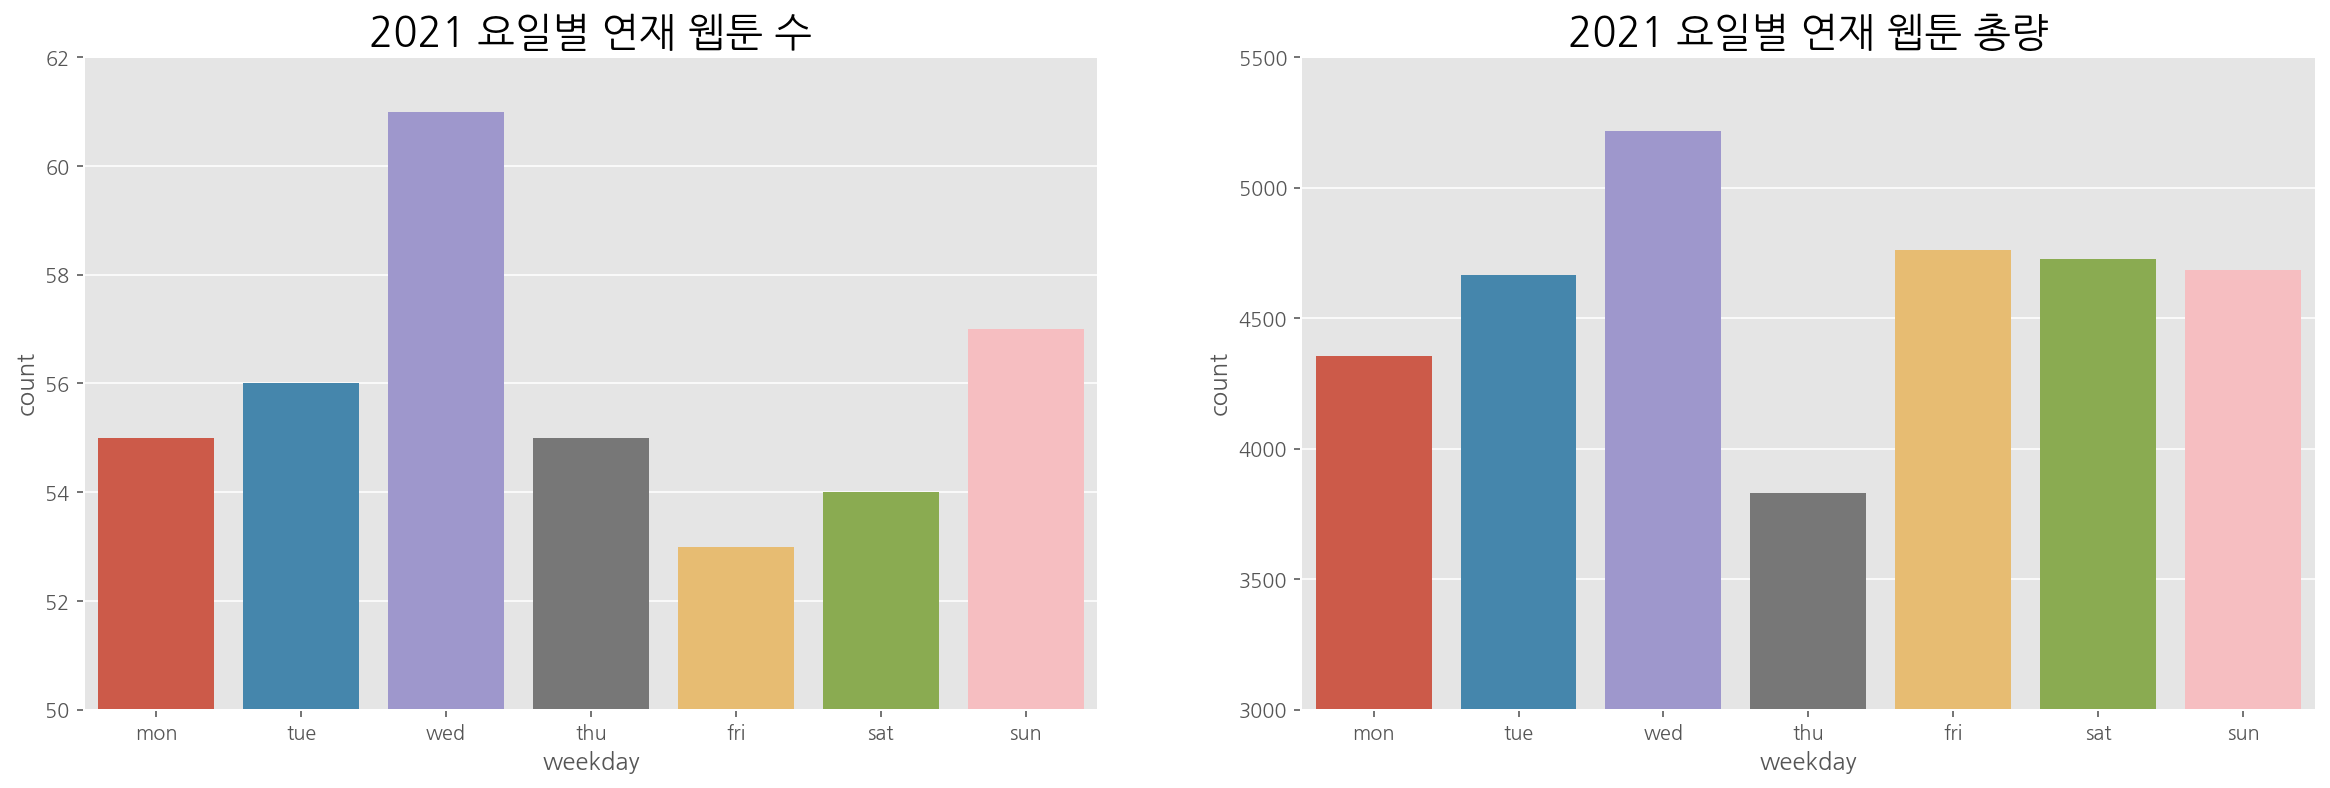

In [74]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.barplot(data=week_len, x='weekday', y='count')
plt.ylim((50, 62))
plt.title("2021 요일별 연재 웹툰 수", fontsize=20)

plt.subplot(122)
sns.barplot(data=week_per_len, x='weekday', y='count')
plt.ylim((3000, 5500))
plt.title("2021 요일별 연재 웹툰 총량", fontsize=20)

plt.show()

In [28]:
genre_count = week_genre.groupby('genre').sum().reset_index()
genre_count.sort_values('genre', inplace=True)

genre_all_count = weekly_df.groupby('genre').size().reset_index(name='count')
genre_all_count.sort_values('genre', inplace=True)

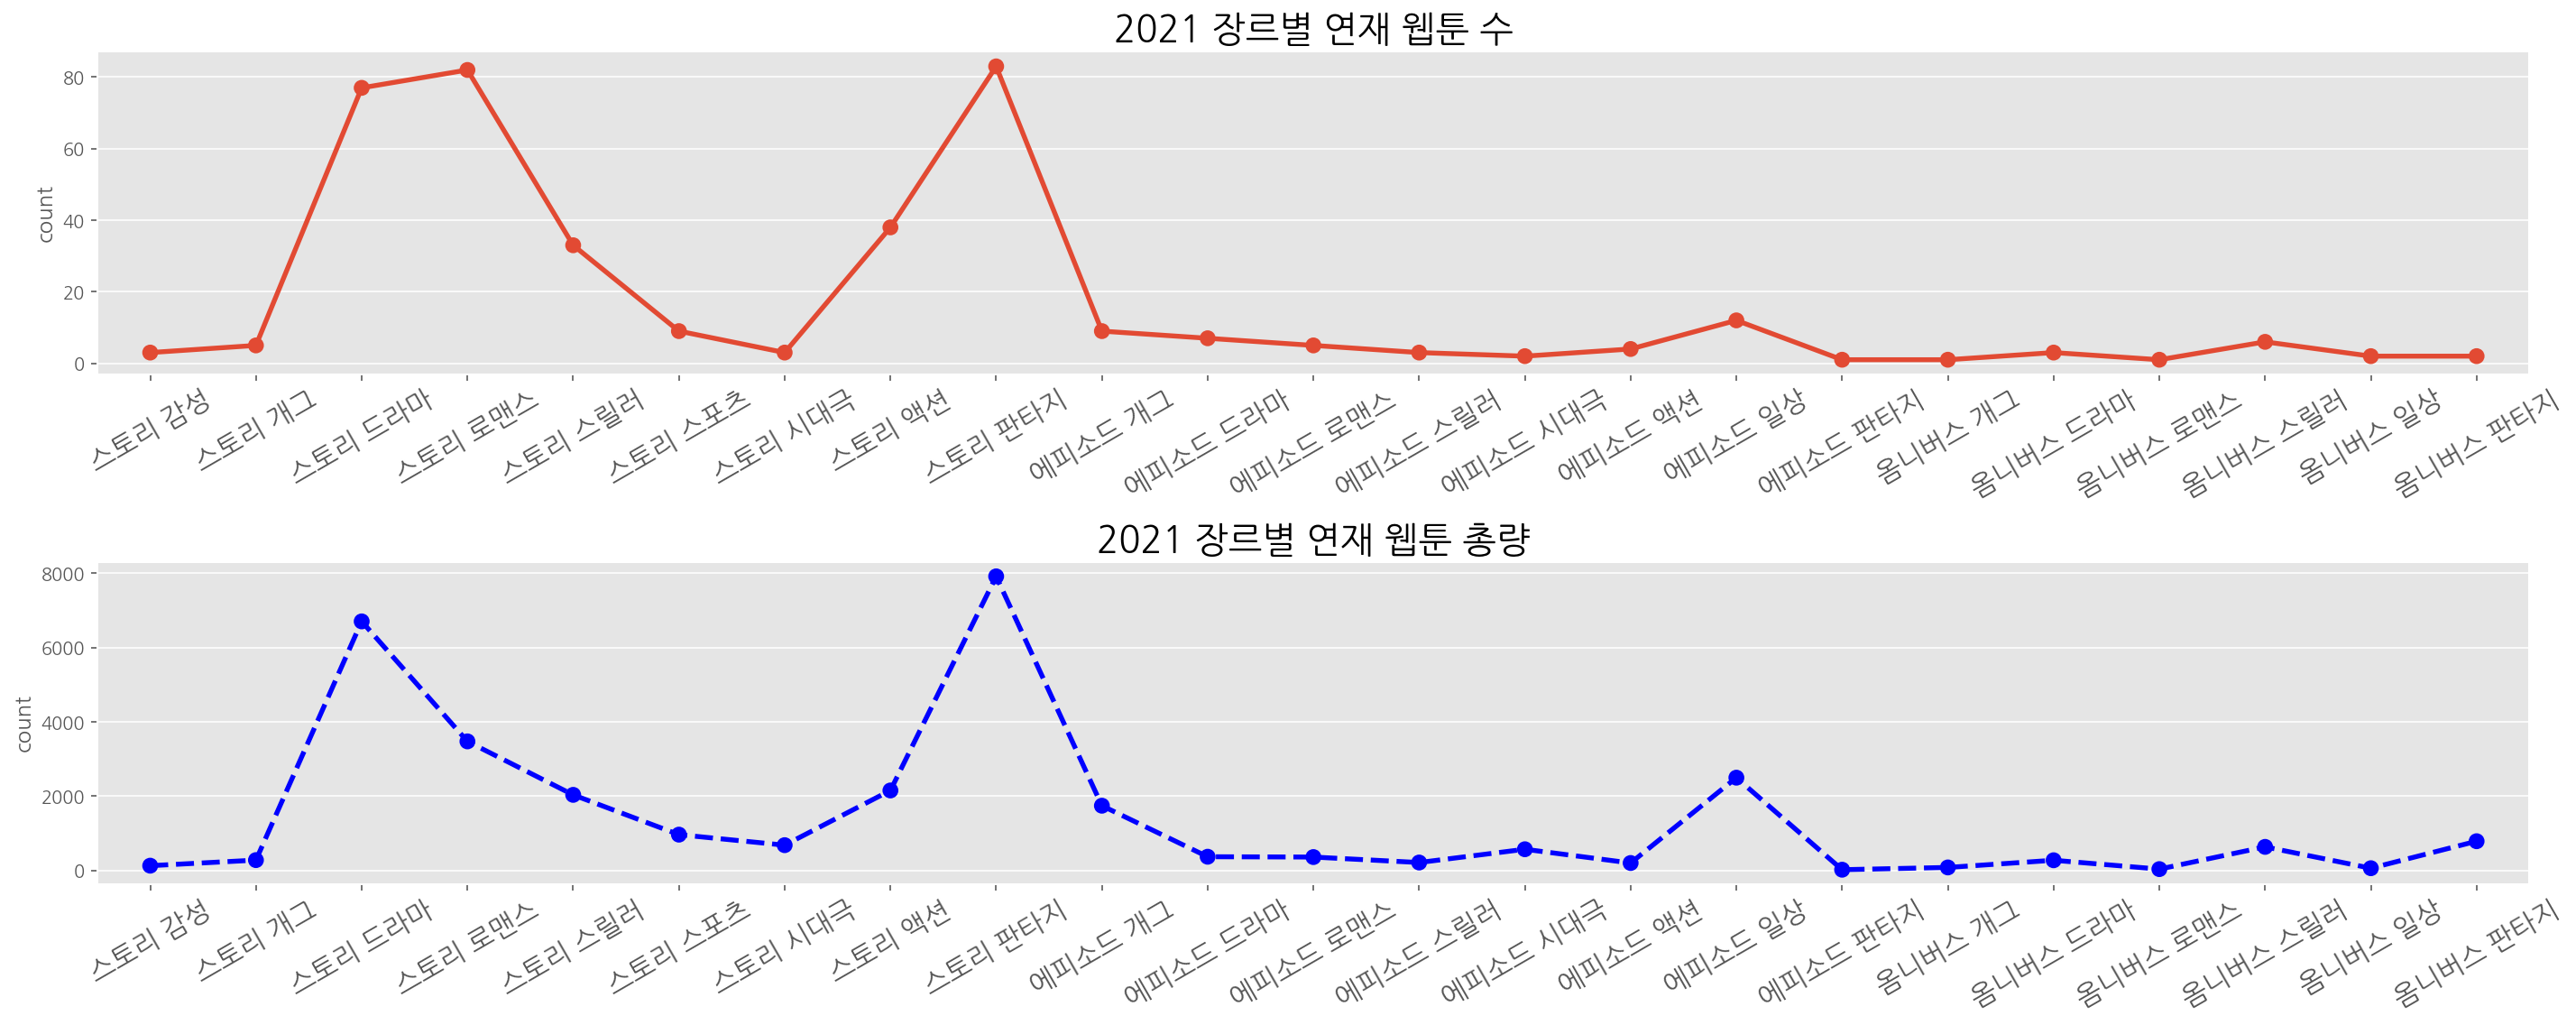

In [51]:
plt.figure(figsize=(20, 8))

plt.subplot(211)
sns.pointplot(data=genre_count, x='genre', y='count')
plt.title('2021 장르별 연재 웹툰 수', fontsize=20)
plt.xlabel(None)
plt.xticks(rotation=30, fontsize=15)

plt.subplot(212)
sns.pointplot(data=genre_all_count, x='genre', y='count', color='blue', linestyles='--')
plt.title('2021 장르별 연재 웹툰 총량', fontsize=20)
plt.xlabel(None)
plt.xticks(rotation=30, fontsize=15)

plt.tight_layout()
plt.show()

In [57]:
genre_mean = weekly_df.groupby('genre').agg('mean').round(2)[['star', 'img', 'person']].reset_index()
genre_mean.sort_values('genre', inplace=True)
genre_mean.tail(2)

,genre,star,img,person
21,옴니버스 일상,9.92,25.89,7018.77
22,옴니버스 판타지,9.96,9.98,5139.53


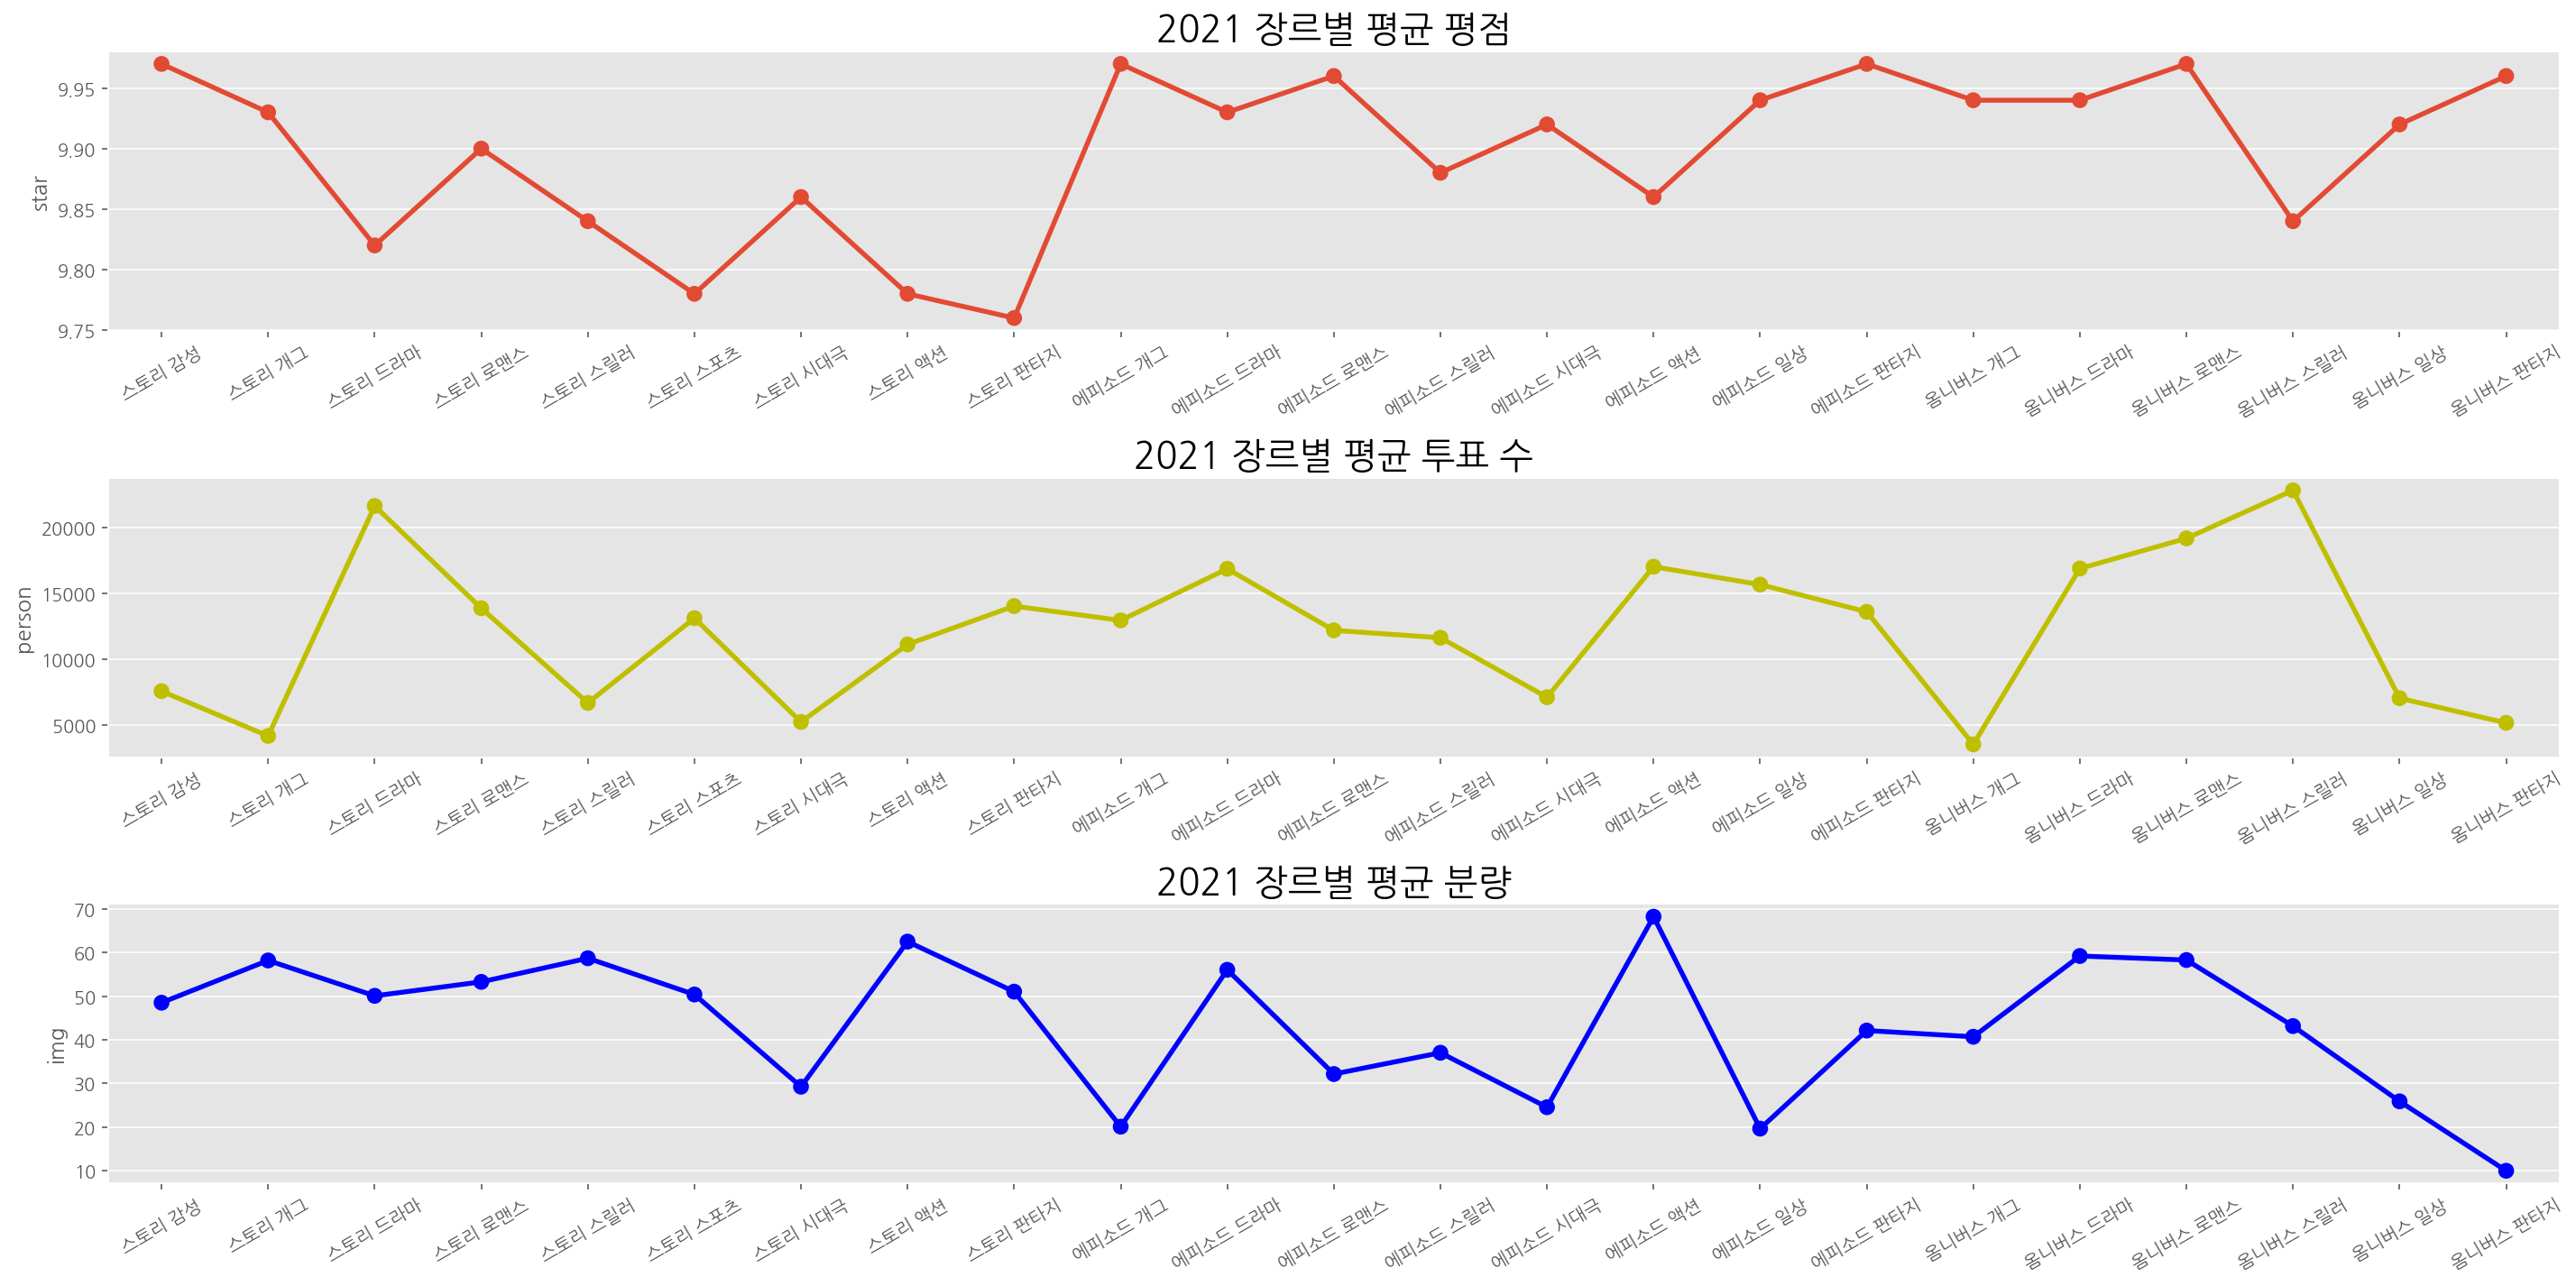

In [67]:
plt.figure(figsize=(20, 10))

plt.subplot(311)
sns.pointplot(data=genre_mean, x='genre', y='star')
plt.title('2021 장르별 평균 평점', fontsize=20)
plt.xlabel(None)
plt.xticks(rotation=30, fontsize=10)

plt.subplot(312)
sns.pointplot(data=genre_mean, x='genre', y='person', color='y')
plt.title('2021 장르별 평균 투표 수', fontsize=20)
plt.xlabel(None)
plt.xticks(rotation=30, fontsize=10)

plt.subplot(313)
sns.pointplot(data=genre_mean, x='genre', y='img', color='b')
plt.title('2021 장르별 평균 분량', fontsize=20)
plt.xlabel(None)
plt.xticks(rotation=30, fontsize=10)

plt.tight_layout()
plt.show()

### 별점이 낮은 회차와 아닌 회차를 구별하는 컬럼 추가

In [5]:
weekly_df["low_star"] = weekly_df.apply(lambda x: 
                                        "lower" if x['star'] < np.percentile(weekly_df[weekly_df['title'] == x['title']]['star'], 25) else "normal"
                                       , axis=1)

In [7]:
weekly_df.head()

,rank,title,genre,star,img,person,datetime,year,quarter,month,day,weekday,low_star
0,1,참교육,스토리 액션,9.20,85,33570,2021-03-28,2021,1,3,28,mon,lower
1,1,참교육,스토리 액션,9.70,85,19922,2021-03-21,2021,1,3,21,mon,normal
2,1,참교육,스토리 액션,9.50,82,19273,2021-03-14,2021,1,3,14,mon,lower
3,1,참교육,스토리 액션,9.94,91,20275,2021-03-07,2021,1,3,7,mon,normal
4,1,참교육,스토리 액션,9.95,86,23133,2021-02-28,2021,1,2,28,mon,normal


In [9]:
lowstar_webtoon = weekly_df[weekly_df['low_star'] == 'lower'][['star', 'img', 'person']]
lowstar_webtoon.reset_index(drop=True, inplace=True)
lowstar_webtoon

,star,img,person
0,9.20,85,33570
1,9.50,82,19273
2,9.68,73,24035
3,9.66,82,24180
4,9.40,95,32725
...,...,...,...
6519,9.50,35,370
6520,9.62,33,446
6521,9.68,33,489
6522,9.61,37,618


In [10]:
lowstar_webtoon['star'].value_counts()

9.95    394
9.96    392
9.94    333
9.97    326
9.93    304
       ... 
6.27      1
8.53      1
7.70      1
4.60      1
3.78      1
Name: star, Length: 427, dtype: int64

In [120]:
title = "참교육"

In [122]:
np.percentile(weekly_df[weekly_df['title'] == title]['star'], 25)

9.7

In [123]:
star= 9.65

In [124]:
star < np.percentile(weekly_df[weekly_df['title'] == title]['star'], 25)

True

In [114]:
result1 = weekly_df.groupby(['rank', 'title']).size().reset_index()[['rank', 'title']].groupby('rank').size().reset_index(name='count')
result1

,rank,count
0,1,6
1,2,7
2,3,7
3,4,7
4,5,7
...,...,...
56,57,2
57,58,1
58,59,1
59,60,1


<AxesSubplot:xlabel='rank', ylabel='count'>

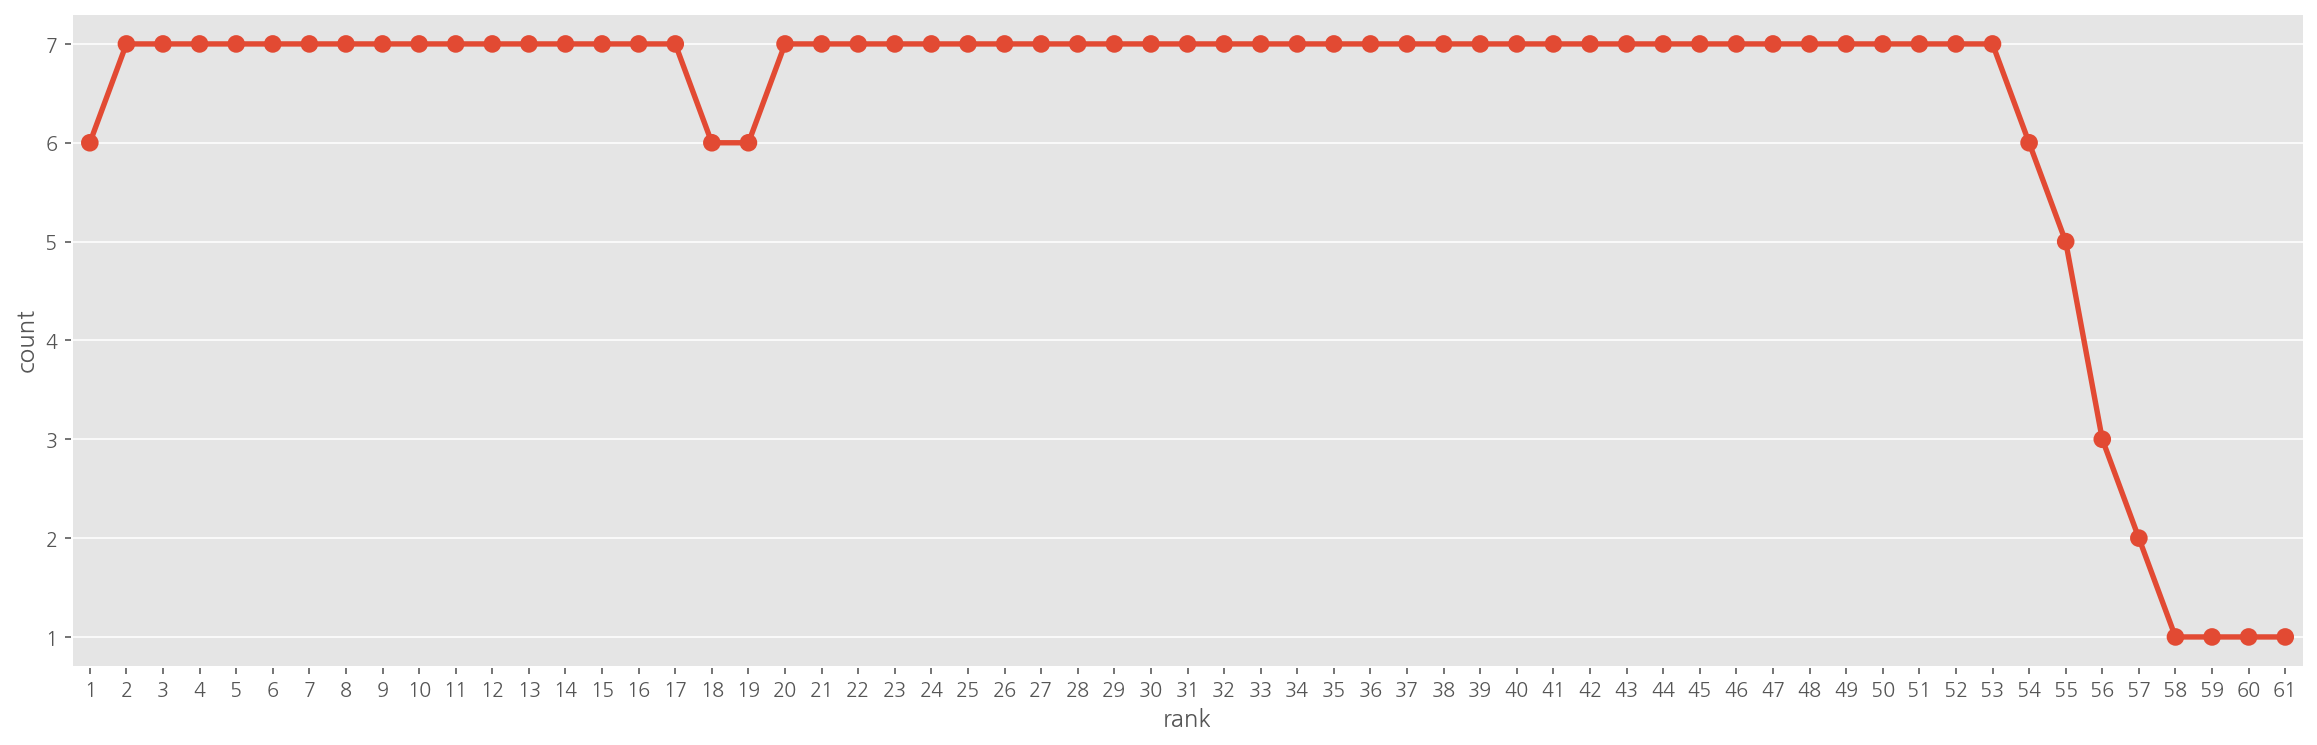

In [118]:
plt.figure(figsize=(20, 6))
sns.pointplot(data=result1, x='rank', y='count') # count=6인 rank는 중복된 웹툰 존재해서

In [12]:
a = np.random.randint(100, size=100)
a

array([46, 93, 50,  7, 60, 78, 64, 48, 10, 60, 12,  3, 78, 79, 35, 65, 12,
       62, 48, 35, 66, 75, 56, 45, 33, 33,  3, 44, 92, 81, 45, 51,  3, 76,
       54, 41, 31, 52, 66, 45, 28, 31, 54, 63, 90,  6, 95, 86, 79, 25, 38,
       73, 48, 32, 41, 54, 78, 40, 63, 26, 78, 30, 54, 28, 76, 65, 58, 12,
       63, 87, 39, 26, 82, 45, 43, 84, 59, 84, 73, 25, 75, 82,  1,  9, 86,
       97, 86,  4, 73, 47, 53, 48, 35, 78, 68, 81, 55, 18, 20, 95])

In [20]:
np.percentile(a, range(25), interpolation='nearest')

array([ 1,  3,  3,  3,  4,  6,  7,  9, 10, 12, 12, 12, 18, 20, 25, 25, 26,
       26, 28, 28, 30, 31, 31, 32, 33])

In [21]:
len(np.percentile(a, range(25), interpolation='nearest'))

25

In [26]:
list(np.percentile(a, range(25), interpolation='nearest'))

[1,
 3,
 3,
 3,
 4,
 6,
 7,
 9,
 10,
 12,
 12,
 12,
 18,
 20,
 25,
 25,
 26,
 26,
 28,
 28,
 30,
 31,
 31,
 32,
 33]

In [22]:
number = 8

In [37]:
iqr = np.percentile(a, range(25), interpolation='nearest')
iqr

array([ 1,  3,  3,  3,  4,  6,  7,  9, 10, 12, 12, 12, 18, 20, 25, 25, 26,
       26, 28, 28, 30, 31, 31, 32, 33])

In [68]:
np.where(iqr == 18)[0][0]

12

In [53]:
def get_score(number):
    if number in np.percentile(a, range(25), interpolation='nearest'):
        return int(np.where(iqr == number)[0]) + 1
        

In [55]:
get_score(12)

TypeError: only size-1 arrays can be converted to Python scalars

In [60]:
number = 12

In [73]:
def get_score(number):
    return np.where(iqr == number)[0][0] + 1

In [74]:
get_score(12), get_score(18), get_score(1)

(10, 13, 1)

In [61]:
for idx, data in enumerate(np.percentile(a, range(25), interpolation='nearest')):
    if number == data:
        score = idx + 1

In [62]:
score

12